In [9]:
import numpy as np
import pandas as pd
  

In [10]:
# Loading iris
df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/iris.csv')
# df.head()
# print(df.describe())
# #data preprocessing
# df['Species'] = pd.Categorical(df['Species'])  # convert Species column to categorical data type
df.head(10)

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Setosa,50,33,14,2
1,Setosa,46,34,14,3
2,Setosa,46,36,10,2
3,Setosa,51,33,17,5
4,Setosa,55,35,13,2
5,Setosa,48,31,16,2
6,Setosa,52,34,14,2
7,Setosa,49,36,14,1
8,Setosa,44,32,13,2
9,Setosa,50,35,16,6


In [11]:
df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

# Splitting the dataset
attr = df.drop(columns = ['Species'])  # features
target = df['Species']  # target variable
attr.head()
# target.head()

Empty DataFrame
Columns: [Species, SepalLength, SepalWidth, PetalLength, PetalWidth]
Index: []


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,50,33,14,2
1,46,34,14,3
2,46,36,10,2
3,51,33,17,5
4,55,35,13,2


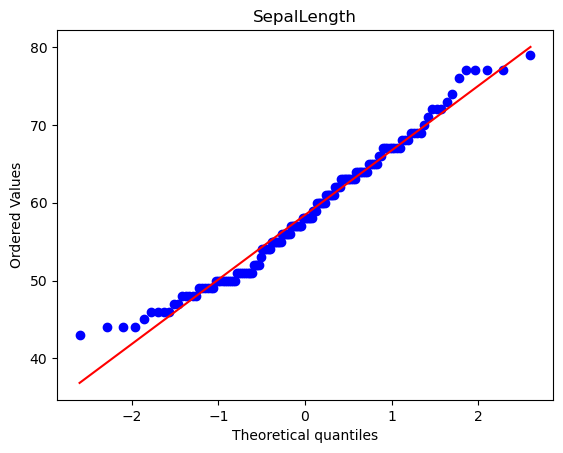

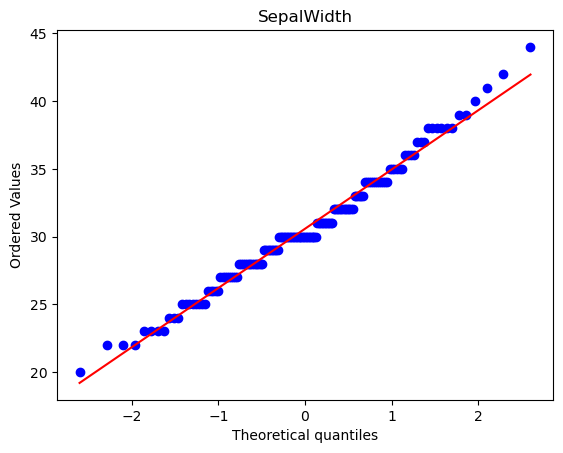

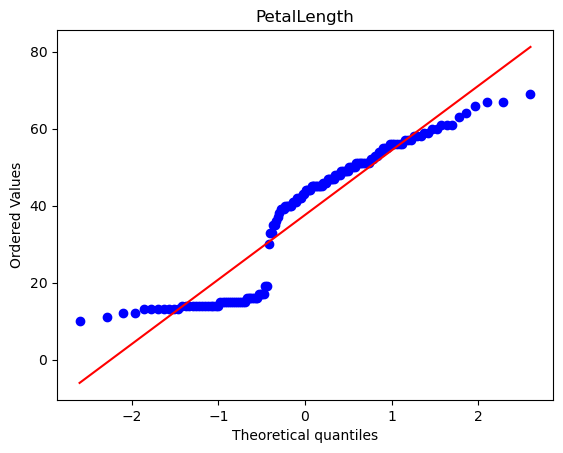

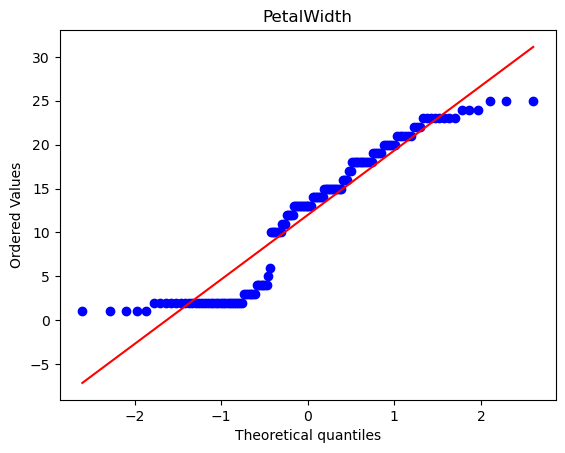

In [12]:
import matplotlib.pyplot as plt   
import scipy.stats as stats
import pylab 

plt=stats.probplot(df['SepalLength'], dist="norm", plot=pylab)
pylab.title("SepalLength") 
pylab.show()
plt=stats.probplot(df['SepalWidth'], dist="norm", plot=pylab)
pylab.title("SepalWidth") 
pylab.show()
plt=stats.probplot(df['PetalLength'], dist="norm", plot=pylab)
pylab.title("PetalLength") 
pylab.show()
plt=stats.probplot(df['PetalWidth'], dist="norm", plot=pylab)
pylab.title("PetalWidth") 
pylab.show()

In [13]:
target.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Species, dtype: object

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.194444,0.541667,0.067797,0.041667
1,0.083333,0.583333,0.067797,0.083333
2,0.083333,0.666667,0.000000,0.041667
3,0.222222,0.541667,0.118644,0.166667
4,0.333333,0.625000,0.050847,0.041667


In [15]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='average')

clusters=groups.fit_predict(attr)

In [16]:
import pandas as pd
df_cluster=pd.DataFrame({'Actual':target,'Cluster':clusters})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)


Cluster      0   1   2
Actual                
Setosa      50   0   0
Versicolor   0  50   0
Virginica    0  17  33
